# Evaluasi Tengah Semester Takehome Data Mining A

### 06211640000093_Izdiharti Noni P

### - Pre-processing data

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
data.shape

(541909, 8)

In [4]:
#cek total data
data.count().sort_values()

CustomerID     406829
Description    540455
InvoiceNo      541909
StockCode      541909
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
Country        541909
dtype: int64

In [5]:
a=np.sum(data.isnull())
a=pd.DataFrame(a,columns=['a'])
b=pd.DataFrame([])
a=a.values
b['Variabel']=list(data)
b['Jumlah Missing']=a
b

,Variabel,Jumlah Missing
0,InvoiceNo,0
1,StockCode,0
2,Description,1454
3,Quantity,0
4,InvoiceDate,0
5,UnitPrice,0
6,CustomerID,135080
7,Country,0


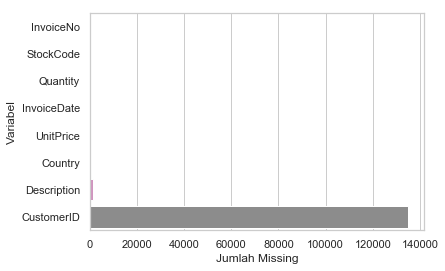

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
bb=b.sort_values('Jumlah Missing')
ax = sns.barplot(x="Jumlah Missing", y="Variabel", data=bb)
plt.show()

### - Association Rule

In [7]:
#menghapus variabel invoiceno yang kosong dengan berawalan C
data['Description'] = data['Description'].str.strip()
data.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
data['InvoiceNo'] = data['InvoiceNo'].astype('str')
data=data[~data['InvoiceNo'].str.contains('C')]

In [8]:
basket = (data.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
basket.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
basket_sets = basket.applymap(encode_units)
 
#menghapus kolom postage
basket_sets.drop('POSTAGE', inplace=True, axis=1)
basket_sets.head()

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Build up the frequent items 
frequent_itemsets = apriori(basket_sets, min_support=0.0045, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.015430,(10 COLOUR SPACEBOY PEN)
1,0.007909,(12 COLOURED PARTY BALLOONS)
2,0.004804,(12 EGG HOUSE PAINTED WOOD)
3,0.007181,(12 IVORY ROSE PEG PLACE SETTINGS)
4,0.012179,(12 MESSAGE CARDS WITH ENVELOPES)


In [11]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE RED RETROSPOT),0.017225,0.017565,0.006453,0.374648,21.329056,0.006151,1.571011
1,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.017565,0.017225,0.006453,0.367403,21.329056,0.006151,1.553556
2,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE SKULL),0.017225,0.017225,0.005289,0.307042,17.824884,0.004992,1.418232
3,(12 PENCILS SMALL TUBE SKULL),(12 PENCIL SMALL TUBE WOODLAND),0.017225,0.017225,0.005289,0.307042,17.824884,0.004992,1.418232
4,(12 PENCIL SMALL TUBE WOODLAND),(JUMBO BAG RED RETROSPOT),0.017225,0.101509,0.004755,0.276056,2.719524,0.003007,1.241106
5,(JUMBO BAG RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.101509,0.017225,0.004755,0.046845,2.719524,0.003007,1.031075
6,(LUNCH BAG RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.075889,0.017225,0.004949,0.065217,3.786099,0.003642,1.051340
7,(12 PENCIL SMALL TUBE WOODLAND),(LUNCH BAG RED RETROSPOT),0.017225,0.075889,0.004949,0.287324,3.786099,0.003642,1.296677
8,(12 PENCIL SMALL TUBE WOODLAND),(PACK OF 72 RETROSPOT CAKE CASES),0.017225,0.064050,0.005046,0.292958,4.573914,0.003943,1.323754
9,(PACK OF 72 RETROSPOT CAKE CASES),(12 PENCIL SMALL TUBE WOODLAND),0.064050,0.017225,0.005046,0.078788,4.573914,0.003943,1.066828


In [12]:
rules[(rules['lift']>=3)&(rules['confidence']>=0.2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE RED RETROSPOT),0.017225,0.017565,0.006453,0.374648,21.329056,0.006151,1.571011
1,(12 PENCILS SMALL TUBE RED RETROSPOT),(12 PENCIL SMALL TUBE WOODLAND),0.017565,0.017225,0.006453,0.367403,21.329056,0.006151,1.553556
2,(12 PENCIL SMALL TUBE WOODLAND),(12 PENCILS SMALL TUBE SKULL),0.017225,0.017225,0.005289,0.307042,17.824884,0.004992,1.418232
3,(12 PENCILS SMALL TUBE SKULL),(12 PENCIL SMALL TUBE WOODLAND),0.017225,0.017225,0.005289,0.307042,17.824884,0.004992,1.418232
7,(12 PENCIL SMALL TUBE WOODLAND),(LUNCH BAG RED RETROSPOT),0.017225,0.075889,0.004949,0.287324,3.786099,0.003642,1.296677
8,(12 PENCIL SMALL TUBE WOODLAND),(PACK OF 72 RETROSPOT CAKE CASES),0.017225,0.064050,0.005046,0.292958,4.573914,0.003943,1.323754
10,(12 PENCIL SMALL TUBE WOODLAND),(PAPER CHAIN KIT 50'S CHRISTMAS),0.017225,0.056286,0.005580,0.323944,5.755306,0.004611,1.395910
12,(12 PENCIL SMALL TUBE WOODLAND),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.017225,0.039788,0.004561,0.264789,6.654916,0.003876,1.306035
14,(12 PENCIL SMALL TUBE WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.017225,0.034160,0.004852,0.281690,8.246239,0.004264,1.344601
16,(12 PENCIL SMALL TUBE WOODLAND),(SET 12 COLOUR PENCILS SPACEBOY),0.017225,0.013683,0.005240,0.304225,22.233263,0.005005,1.417581
